# Data Manipulation with Pandas
<ul>
    <li>Introducing DataFrames</li>
    <li>Sorting and Subsetting</li>
    <li>New columns</li>
    <li>DataFrame Aggregation</li>
     <li>Slicing and Indexing DataFrames</li>
      <li>Creating and Visualizing Dataframes</li>
</ul>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('annual-enterprise-survey-2023-financial-year-provisional.csv')

## Transforming DataFrames

In [4]:

# ~ Basic Descriptive Statistics
display(df.head(5)) 
display(df.shape) # * rows and columns
display(df.describe()) # * count- number of non-missing 
display(df.info()) # * shows column types and non missing values
#display(df.values) # * data values in 2D numpy array
display(df.columns,df.index) # * columns and index

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2023,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,930995,ANZSIC06 divisions A-S (excluding classes K633...
1,2023,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,821630,ANZSIC06 divisions A-S (excluding classes K633...
2,2023,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,84354,ANZSIC06 divisions A-S (excluding classes K633...
3,2023,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,25010,ANZSIC06 divisions A-S (excluding classes K633...
4,2023,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,832964,ANZSIC06 divisions A-S (excluding classes K633...


(50985, 10)

,Year
count,50985.000000
mean,2018.000000
std,3.162309
min,2013.000000
25%,2015.000000
50%,2018.000000
75%,2021.000000
max,2023.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50985 entries, 0 to 50984
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         50985 non-null  int64 
 1   Industry_aggregation_NZSIOC  50985 non-null  object
 2   Industry_code_NZSIOC         50985 non-null  object
 3   Industry_name_NZSIOC         50985 non-null  object
 4   Units                        50985 non-null  object
 5   Variable_code                50985 non-null  object
 6   Variable_name                50985 non-null  object
 7   Variable_category            50985 non-null  object
 8   Value                        50985 non-null  object
 9   Industry_code_ANZSIC06       50985 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


None

Index(['Year', 'Industry_aggregation_NZSIOC', 'Industry_code_NZSIOC',
       'Industry_name_NZSIOC', 'Units', 'Variable_code', 'Variable_name',
       'Variable_category', 'Value', 'Industry_code_ANZSIC06'],
      dtype='object')

RangeIndex(start=0, stop=50985, step=1)

In [5]:

# ~ Sorting and Subsetting
df.sort_values("Industry_code_NZSIOC") # * Sort by the name of the column. Default ascending, pass ascending=False for descending
df.sort_values(["Variable_category","Value"], ascending=[True,True]) 
df["Value"] # * shows the Value column only
cols_to_subset = ["Variable_category","Value"]
df[cols_to_subset]
df[df["Industry_name_NZSIOC"]!= "All industries"][cols_to_subset] # * Subset with filtering
df[df['Industry_name_NZSIOC'].isin(['Agriculture,Forestry and Fishing','Food product manufacturing'])].head(10)

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
50949,2013,Level 3,ZZ11,Food product manufacturing,Dollars (millions),H01,Total income,Financial performance,"36,411","ANZSIC06 groups C111, C112, C113, C114, C115, ..."
50950,2013,Level 3,ZZ11,Food product manufacturing,Dollars (millions),H02,Sales of goods not further processed,Financial performance,"2,808","ANZSIC06 groups C111, C112, C113, C114, C115, ..."
50951,2013,Level 3,ZZ11,Food product manufacturing,Dollars (millions),H03,Sales of other goods and services,Financial performance,"33,253","ANZSIC06 groups C111, C112, C113, C114, C115, ..."
50952,2013,Level 3,ZZ11,Food product manufacturing,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,C,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
50953,2013,Level 3,ZZ11,Food product manufacturing,Dollars (millions),H06,"Government funding, grants and subsidies",Financial performance,C,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
50954,2013,Level 3,ZZ11,Food product manufacturing,Dollars (millions),H07,Non-operating income,Financial performance,177,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
50955,2013,Level 3,ZZ11,Food product manufacturing,Dollars (millions),H08,Total expenditure,Financial performance,"35,502","ANZSIC06 groups C111, C112, C113, C114, C115, ..."
50956,2013,Level 3,ZZ11,Food product manufacturing,Dollars (millions),H09,Interest and donations,Financial performance,438,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
50957,2013,Level 3,ZZ11,Food product manufacturing,Dollars (millions),H10,Indirect taxes,Financial performance,82,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
50958,2013,Level 3,ZZ11,Food product manufacturing,Dollars (millions),H11,Depreciation,Financial performance,820,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."


In [6]:
employability=pd.read_excel('Student-Employability-Datasets.xlsx')
employability.head()

# ~ New columns
cols_to_sum=list(employability)
cols_to_sum.remove('CLASS')
cols_to_sum.remove('Name of Student')
employability['Employability Score']=(employability[cols_to_sum].sum(axis=1))/employability[cols_to_sum].count(axis=1)
display(employability)

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS,Employability Score
0,Student 1,4,5,4,5,5,5,5,5,Employable,4.750
1,Student 2,4,4,4,4,4,4,3,5,Employable,4.000
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable,3.250
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable,3.125
4,Student 5,4,4,3,3,4,4,3,5,Employable,3.750
...,...,...,...,...,...,...,...,...,...,...,...
2977,Student 2996,4,3,3,3,3,3,2,5,Employable,3.250
2978,Student 2997,3,4,4,4,4,4,4,5,Employable,4.000
2979,Student 2998,4,5,4,5,4,4,4,5,Employable,4.375
2980,Student 2999,4,4,4,3,4,4,3,5,LessEmployable,3.875


## Aggregating DataFrames

In [7]:
covid=pd.read_csv('country_wise_latest.xls')
# display(covid.head())
display(covid[covid['New cases']==covid['New cases'].max()]) # * Maximum number of new cases
display(covid[covid['1 week change']==covid['1 week change'].min()]) # * Minimum number of 1 Week change

# & agg() - method to pass functions (self-made) as aggregate
def pct75(c): #75 percentile
    return c.quantile(0.75)
display(covid[covid['New cases']==covid['New cases'].agg(pct75)])
def pct5(c): #75 percentile
    return c.quantile(0.5)
display(covid[['Recovered','Confirmed','Deaths','Active']].agg([pct75,pct5]))

# ~ Dropping duplicate names
display(df.drop_duplicates(subset=['Industry_name_NZSIOC','Variable_name']).head()) # * drop duplicates based from column
display(df['Industry_name_NZSIOC'].value_counts(sort=True)) # * Count the number of values for each unique value name
display(df['Industry_name_NZSIOC'].value_counts(sort=True,normalize=True)) # * normalize displays as proprtion of total

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.9,11.16,3834677,455582,11.88,Americas


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
88,Jordan,1176,11,1041,124,8,0,0,0.94,88.52,1.06,1223,-47,-3.84,Eastern Mediterranean


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region


,Recovered,Confirmed,Deaths,Active
pct75,22606.0,40460.5,734.0,9149.0
pct5,2815.0,5059.0,108.0,1600.0


,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2023,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,930995,ANZSIC06 divisions A-S (excluding classes K633...
1,2023,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,821630,ANZSIC06 divisions A-S (excluding classes K633...
2,2023,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,84354,ANZSIC06 divisions A-S (excluding classes K633...
3,2023,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,25010,ANZSIC06 divisions A-S (excluding classes K633...
4,2023,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,832964,ANZSIC06 divisions A-S (excluding classes K633...


Industry_name_NZSIOC
Public Order, Safety and Regulatory Services             961
Printing                                                 792
Pulp, Paper and Converted Paper Product Manufacturing    792
Wood Product Manufacturing                               792
Beverage and Tobacco Product Manufacturing               792
                                                        ... 
Health and General Insurance                             275
Life Insurance                                           275
Insurance                                                275
Public order, safety and regulatory services              62
Food product manufacturing                                36
Name: count, Length: 119, dtype: int64

Industry_name_NZSIOC
Public Order, Safety and Regulatory Services             0.018849
Printing                                                 0.015534
Pulp, Paper and Converted Paper Product Manufacturing    0.015534
Wood Product Manufacturing                               0.015534
Beverage and Tobacco Product Manufacturing               0.015534
                                                           ...   
Health and General Insurance                             0.005394
Life Insurance                                           0.005394
Insurance                                                0.005394
Public order, safety and regulatory services             0.001216
Food product manufacturing                               0.000706
Name: proportion, Length: 119, dtype: float64

## Grouped Summary Statistics

In [8]:
# Using employability dataset
# & groupby() - Groups data based on a column
display(employability.groupby('CLASS')['Employability Score'].agg([min,max,'mean']))

employability[np.logical_and(employability['CLASS']=='LessEmployable',employability['Employability Score']==5)]

# ~ Pivot Tables
display(employability.pivot_table(values=['Student Performance Rating','Employability Score'],index='CLASS')) #* mean by default
display(employability.pivot_table(values=['Student Performance Rating','Employability Score'],index='CLASS',aggfunc=[np.mean,np.median]))
# * Arguments: fill_value - fills NA columns with the value
#* columns - Second Column to be grouped by for the dataset
# * margins - True or Fales. Allows for summary statistics for multiple levels of the dataset 

/tmp/ipykernel_5662/2422821507.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  display(employability.groupby('CLASS')['Employability Score'].agg([min,max,'mean']))
/tmp/ipykernel_5662/2422821507.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  display(employability.groupby('CLASS')['Employability Score'].agg([min,max,'mean']))


,min,max,mean
CLASS,,,
Employable,2.875,5.0,4.076995
LessEmployable,2.875,5.0,3.872107


,Employability Score,Student Performance Rating
CLASS,,
Employable,4.076995,4.610179
LessEmployable,3.872107,4.611333


/tmp/ipykernel_5662/2422821507.py:9: FutureWarning: The provided callable <function mean at 0x7573e8155080> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  display(employability.pivot_table(values=['Student Performance Rating','Employability Score'],index='CLASS',aggfunc=[np.mean,np.median]))
/tmp/ipykernel_5662/2422821507.py:9: FutureWarning: The provided callable <function median at 0x7573e8084b80> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  display(employability.pivot_table(values=['Student Performance Rating','Employability Score'],index='CLASS',aggfunc=[np.mean,np.median]))


mean                             \
               Employability Score Student Performance Rating   
CLASS                                                           
Employable                4.076995                   4.610179   
LessEmployable            3.872107                   4.611333   

                            median                             
               Employability Score Student Performance Rating  
CLASS                                                          
Employable                   4.125                        5.0  
LessEmployable               3.875                        5.0

## Slicing and Indexing DataFrames

In [9]:

#* Setting a column as index
employability_ind=employability.set_index('Name of Student')
display(employability_ind.head(1))
# * drop index
display(employability_ind.reset_index().head(1))

# & Multilevel indexes
employability_ind_1=employability.set_index(['CLASS','Name of Student'])
display(employability_ind_1.head(5))

# * sort_index() - sorts DataFrame by indexes
employability_ind_1.sort_index()
#* sort by level
employability_ind_1.sort_index(level=['CLASS','Name of Student'])

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS,Employability Score
Name of Student,,,,,,,,,,
Student 1,4,5,4,5,5,5,5,5,Employable,4.75


,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS,Employability Score
0,Student 1,4,5,4,5,5,5,5,5,Employable,4.75


GENERAL APPEARANCE  MANNER OF SPEAKING  \
CLASS          Name of Student                                           
Employable     Student 1                         4                   5   
               Student 2                         4                   4   
LessEmployable Student 3                         4                   3   
               Student 4                         3                   3   
Employable     Student 5                         4                   4   

                                PHYSICAL CONDITION  MENTAL ALERTNESS  \
CLASS          Name of Student                                         
Employable     Student 1                         4                 5   
               Student 2                         4                 4   
LessEmployable Student 3                         3                 3   
               Student 4                         3                 2   
Employable     Student 5                         3                 3   

                                SELF-CONFIDENCE  ABILITY TO PRESENT IDEAS  \
CLASS          Name of Student                                              
Employable     Student 1                      5                         5   
               Student 2                      4                         4   
LessEmployable Student 3                      3                         3   
               Student 4                      3                         3   
Employable     Student 5                      4                         4   

                                COMMUNICATION SKILLS  \
CLASS          Name of Student                         
Employable     Student 1                           5   
               Student 2                           3   
LessEmployable Student 3                           2   
               Student 4                           3   
Employable     Student 5                           3   

                                Student Performance Rating  \
CLASS          Name of Student                               
Employable     Student 1                                 5   
               Student 2                                 5   
LessEmployable Student 3                                 5   
               Student 4                                 5   
Employable     Student 5                                 5   

                                Employability Score  
CLASS          Name of Student                       
Employable     Student 1                      4.750  
               Student 2                      4.000  
LessEmployable Student 3                      3.250  
               Student 4                      3.125  
Employable     Student 5                      3.750

GENERAL APPEARANCE  MANNER OF SPEAKING  \
CLASS          Name of Student                                           
Employable     Student 1                         4                   5   
               Student 10                        4                   4   
               Student 100                       4                   4   
               Student 1000                      3                   3   
               Student 1003                      4                   3   
...                                            ...                 ...   
LessEmployable Student 988                       3                   4   
               Student 99                        4                   4   
               Student 991                       4                   4   
               Student 993                       5                   3   
               Student 997                       4                   4   

                                PHYSICAL CONDITION  MENTAL ALERTNESS  \
CLASS          Name of Student                                         
Employable     Student 1                         4                 5   
               Student 10                        3                 4   
               Student 100                       4                 3   
               Student 1000                      3                 3   
               Student 1003                      3                 3   
...                                            ...               ...   
LessEmployable Student 988                       4                 3   
               Student 99                        3                 4   
               Student 991                       3                 4   
               Student 993                       3                 4   
               Student 997                       4                 3   

                                SELF-CONFIDENCE  ABILITY TO PRESENT IDEAS  \
CLASS          Name of Student                                              
Employable     Student 1                      5                         5   
               Student 10                     3                         4   
               Student 100                    3                         4   
               Student 1000                   3                         2   
               Student 1003                   3                         3   
...                                         ...                       ...   
LessEmployable Student 988                    4                         4   
               Student 99                     3                         4   
               Student 991                    3                         4   
               Student 993                    3                         3   
               Student 997                    4                         4   

                                COMMUNICATION SKILLS  \
CLASS          Name of Student                         
Employable     Student 1                           5   
               Student 10                          4   
               Student 100                         3   
               Student 1000                        2   
               Student 1003                        2   
...                                              ...   
LessEmployable Student 988                         3   
               Student 99                          3   
               Student 991                         3   
               Student 993                         3   
               Student 997                         3   

                                Student Performance Rating  \
CLASS          Name of Student                               
Employable     Student 1                                 5   
               Student 10                                5   
               Student 100                               5   
               Student 1000                              4   
               Student 1003  

In [10]:
# PAY ATTENTION!!!
#~ Slicing with .loc and .iloc
#* .loc - slices the outer index level
employability_ind_1.loc["Employable":"Student 1000"]
#* Inner level indexing
employability_ind_1.loc[("Employable","Student 1"):("Employable","Student 1000")]
print(temperatures_srt.loc[('India','Hyderabad'):('Iraq','Baghdad'),'date':'avg_temp_c'])

UnsortedIndexError: 'Key length (1) was greater than MultiIndex lexsort depth (0)'

In [ ]:

#~ Working with Pivot Tables
employability.pivot_table('Student Performance Rating',index='CLASS',columns='Employability Score')

Employability Score,2.875,3.000,3.125,3.250,3.375,3.500,3.625,3.750,3.875,4.000,4.125,4.250,4.375,4.500,4.625,4.750,4.875,5.000
CLASS,,,,,,,,,,,,,,,,,,
Employable,4.0,4.515152,3.000000,4.195122,4.770270,4.257576,4.496183,4.885906,4.985507,4.390977,4.833333,4.333333,4.488722,4.09589,4.809524,5.0,5.0,5.0
LessEmployable,4.0,5.000000,4.746269,4.346939,3.573171,4.098214,4.414634,4.864407,4.714286,4.757812,5.000000,5.000000,4.062500,5.00000,4.515152,5.0,5.0,5.0


## Creating and Visualizing DataFrames

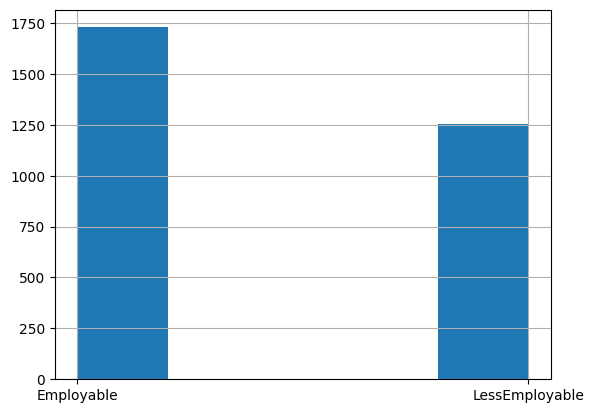

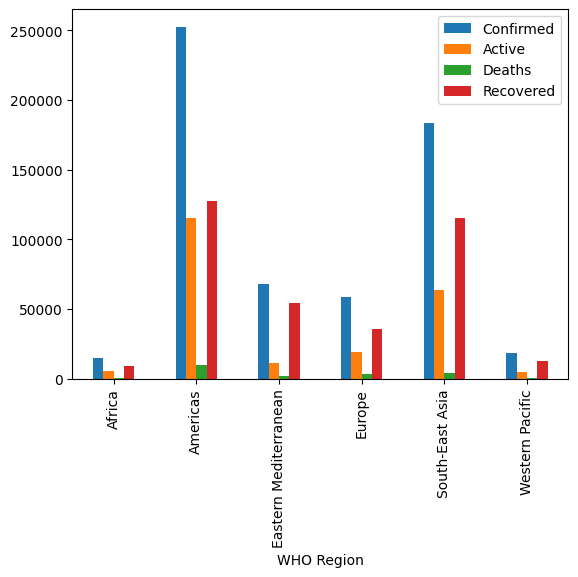

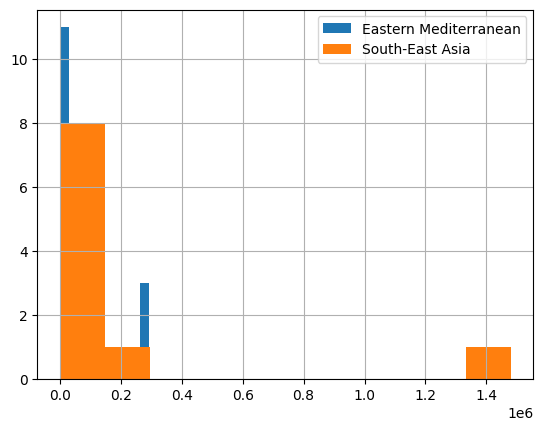

In [ ]:
employability['CLASS'].hist(bins=5)
plt.show()
cv_group=covid.groupby('WHO Region')[['Confirmed','Active','Deaths','Recovered']].agg('mean','median',max,min)
cv_group.plot(kind='bar')
plt.show()

# Histogram of Eastern Mediterranean
covid[covid['WHO Region']=='Eastern Mediterranean']['Confirmed'].hist()

# Histogram of South East Asia
covid[covid['WHO Region']=='South-East Asia']['Confirmed'].hist()

# Add a legend
plt.legend(['Eastern Mediterranean','South-East Asia'])

# Show the plot
plt.show()

In [ ]:

#~ Missing Values 
covid.isna().any()
covid.dropna()
covid.fillna(0)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


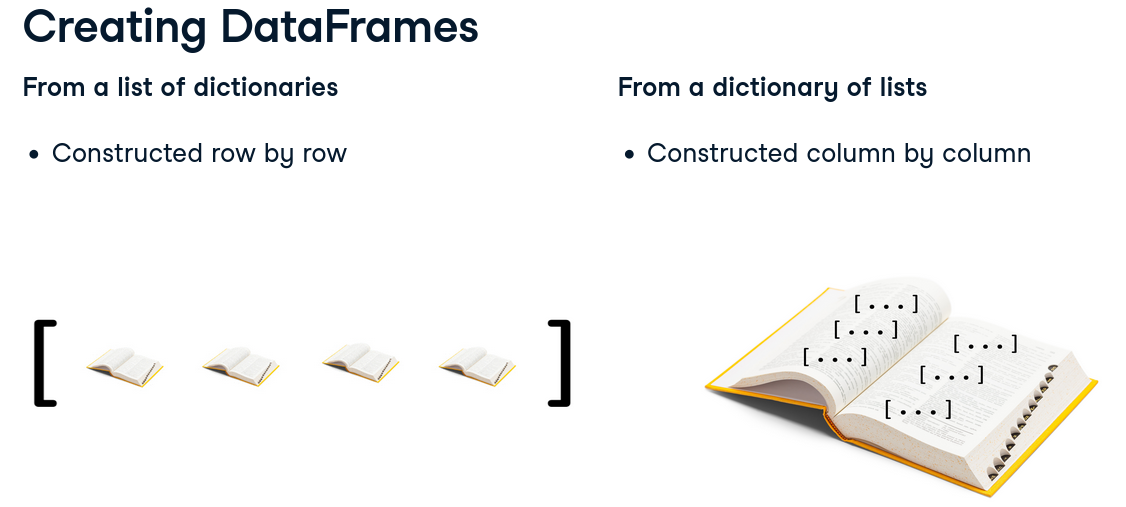

In [11]:
List_of_dicts=[{'name':'Ginger','breed':'Daschund','date-of-birth':'2019-03-14'},{'name':'Scout','breed':'Dalmatian','date-of-birth':'2019-05-06'}]
df1=pd.DataFrame(List_of_dicts)
display(df1)

Dicts_of_lists={'name':['Ginger','Scout'],'breed':['Dachshund','Dalmatian'],'date-of-birth':['2019-03-14','2019-05-06']}
df2=pd.DataFrame(Dicts_of_lists)
display(df2)
print(df2.index)

,name,breed,date-of-birth
0,Ginger,Daschund,2019-03-14
1,Scout,Dalmatian,2019-05-06


,name,breed,date-of-birth
0,Ginger,Dachshund,2019-03-14
1,Scout,Dalmatian,2019-05-06


RangeIndex(start=0, stop=2, step=1)


In [1]:
# Save to CSV
df2.to_csv('df2.csv')

#~ filtering based on an expression
covid['greater_than_5000'] = np.where(covid['Active']>5000,'Infected','Not Infected')
#* Creates a new column that will give 'Infected' if Active cases is greater than 50000 and 'Not Infected' otherwise

NameError: name 'df2' is not defined